# Introduction

This in the introductory section of the final assignment of IBM Applied Data Science Capstone course on Coursera. Here, the students are asked to be as creative as they want to implement Foursquare API and clustering algorithm to explore or compare neighbourhoods or cities of their choice. Based on these instructions, I have decided to compare the neighbourhoods of New York City, particularly the borough of Manhattan in order to find out which neighbourhood is the best to open a restaurant.

## Business problem and who this project is aimed at

Comparing neighbourhoods can be quite daunting due to their cosmopolitan and extremely busy lifestyles. However, this project aims to be of use to you through the analysis and comparison of the neighbourhoods in Manhattan. I have chosen Manhattan as it is my intention to carry out an indepth analysis on the neighbourhoods of thos area. I have made this decision due to the high population density  and commercial lifestyle of Manhattan. The people who can hope to benefit from this project are

- Those who are planning to migrate to Manhattan
- A New Yorker trying to change neighbourhoods to find a more happening area
- Those who would like to expand or open their businesses in Manhattan, NYC

## Aim and Objectives

This project aims to compare the neighbourhoods of Manhattan based on crime rates, rent data, and other similarities. In order to satisfy the criteria, the following will be the immediate objectives:

- Collecting crime rate data in Manhattan
- Collecting venues data in Manhattan
- Clustering the neighbourhoods based on the similarities of restaurants
- Making a few key recommendations regarding the business opportunities in Manhattan

## Weather data and its Analysis

The reason for analysing weather first is because of its important effect on human behaviour.
For example, on a rainy day, one might crave a hot beverage. On a warm sunny day, one might prefer desert. In addition to all this, having sound knowledge of the weather data and patterns can also help restaurant owners as they can make additions which will make their menus more appetizing!

### Procedure

- First the data for the year 2019 was obtained from www.currentresults.com
- Then the data was cleaned and organized to obtain the dataframe as shown below
- After obtaining the df shown below, the average temperatures were calculated and three graphs, depicting important statistics were plotted. 

In [1]:
import pandas as pd
import numpy as np
weather = pd.read_excel('ny.xlsx')

In [2]:
weather.head()

High_F  Low_F     Month  Days over 70F  Days over 90F  Days_below_32F  \
0      39     27   January              0              0              20   
1      42     29  February              0              0              18   
2      50     35     March              1              0              10   
3      63     46     April              6              0               1   
4      73     56       May             16              1               0   

   Days_below_20F  
0               8  
1               4  
2               1  
3               0  
4               0

In [3]:
weather_stats = weather.describe()
weather_stats

High_F      Low_F  Days over 70F  Days over 90F  Days_below_32F  \
count  12.000000  12.000000      12.000000      12.000000       12.000000   
mean   63.333333  49.083333      11.666667       1.083333        5.500000   
std    17.009801  15.721776      12.485143       1.831955        7.786935   
min    39.000000  27.000000       0.000000       0.000000        0.000000   
25%    48.750000  35.000000       0.750000       0.000000        0.000000   
50%    64.500000  49.500000       6.500000       0.000000        0.500000   
75%    78.500000  63.250000      23.750000       1.250000       11.000000   
max    86.000000  71.000000      30.000000       6.000000       20.000000   

       Days_below_20F  
count       12.000000  
mean         1.333333  
std          2.498484  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.500000  
max          8.000000

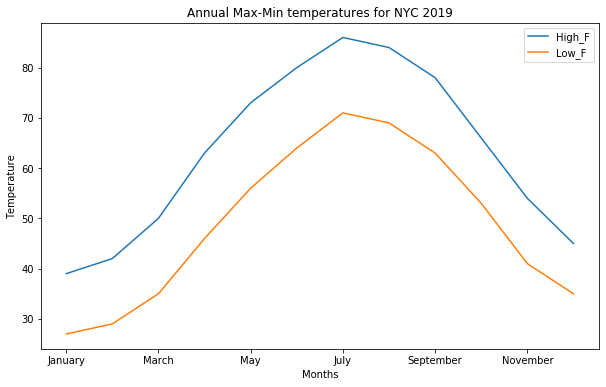

In [4]:
#The line plot for showing the max and min temps
import matplotlib.pyplot as plt
weather.plot(x='Month', y=['High_F','Low_F'], figsize = (10,6), kind = 'line')
plt.title('Annual Max-Min temperatures for NYC 2019')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

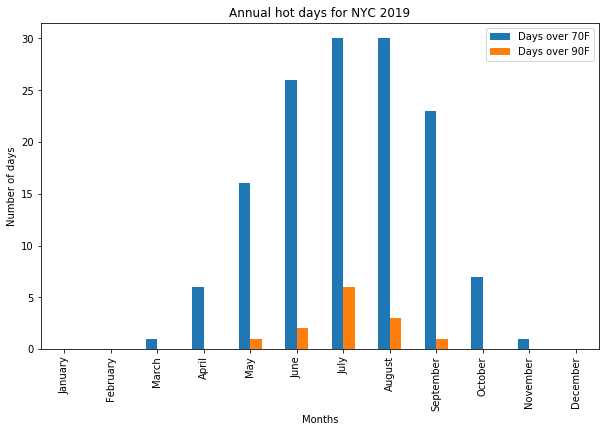

In [5]:
weather.plot(x='Month', y=['Days over 70F','Days over 90F'], figsize = (10,6), kind = 'bar')
plt.title('Annual hot days for NYC 2019')
plt.xlabel('Months')
plt.ylabel('Number of days')
plt.show()

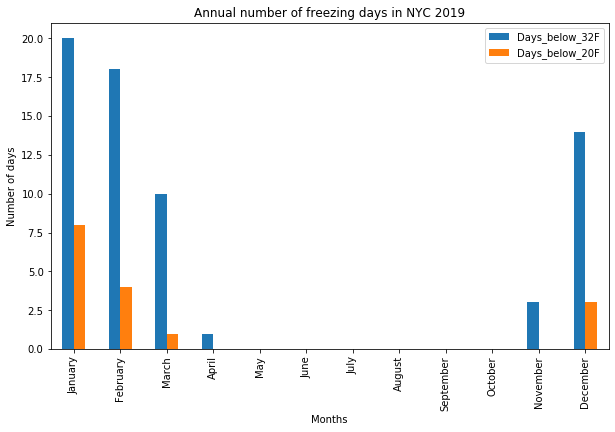

In [6]:
weather.plot(x='Month', y=['Days_below_32F','Days_below_20F'], figsize = (10,6), kind = 'bar')
plt.title('Annual number of freezing days in NYC 2019')
plt.xlabel('Months')
plt.ylabel('Number of days')
plt.show()

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
!pip install geopy 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium  
import folium 
print('Libraries imported.')

Libraries imported.


##  Data acquisition for Manhattan's neighbourhoods

The NYCloc csv file contains all the data on the neighbourhoods of Nyc. This file was obtained from the week 3 lab in the IBM 'Applied Data Science Capstone project' course.

This csv file was further segmented into 5 different dataframes, with one dataframe per each borough. The Manhattan borough is of significant importance as all the analysis has been carried out on it.

In [8]:
nyc=pd.read_csv('NYCloc.csv')
nyc.head()

Unnamed: 0 Borough Neighborhood   Latitude  Longitude
0           0   Bronx    Wakefield  40.894705 -73.847201
1           1   Bronx   Co-op City  40.874294 -73.829939
2           2   Bronx  Eastchester  40.887556 -73.827806
3           3   Bronx    Fieldston  40.895437 -73.905643
4           4   Bronx    Riverdale  40.890834 -73.912585

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_locator")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
#an initial map with the neighbourhoods of NYC superimposed on it
mapnyc = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(nyc['Latitude'], nyc['Longitude'], nyc['Borough'], nyc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(mapnyc)  
    
mapnyc

In [11]:
#creating 5 new dataframes for the 5 different boroughs of NYC
man_data = nyc[nyc['Borough'] == 'Manhattan'].reset_index(drop=True)
man_data.head()

Unnamed: 0    Borough        Neighborhood   Latitude  Longitude
0           6  Manhattan         Marble Hill  40.876551 -73.910660
1         100  Manhattan           Chinatown  40.715618 -73.994279
2         101  Manhattan  Washington Heights  40.851903 -73.936900
3         102  Manhattan              Inwood  40.867684 -73.921210
4         103  Manhattan    Hamilton Heights  40.823604 -73.949688

In [12]:
brook_data=nyc[nyc['Borough'] == 'Brooklyn'].reset_index(drop=True)
brook_data.head()

Unnamed: 0   Borough Neighborhood   Latitude  Longitude
0          46  Brooklyn    Bay Ridge  40.625801 -74.030621
1          47  Brooklyn  Bensonhurst  40.611009 -73.995180
2          48  Brooklyn  Sunset Park  40.645103 -74.010316
3          49  Brooklyn   Greenpoint  40.730201 -73.954241
4          50  Brooklyn    Gravesend  40.595260 -73.973471

In [13]:
bronx_data=nyc[nyc['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

Unnamed: 0 Borough Neighborhood   Latitude  Longitude
0           0   Bronx    Wakefield  40.894705 -73.847201
1           1   Bronx   Co-op City  40.874294 -73.829939
2           2   Bronx  Eastchester  40.887556 -73.827806
3           3   Bronx    Fieldston  40.895437 -73.905643
4           4   Bronx    Riverdale  40.890834 -73.912585

In [14]:
queens_data=nyc[nyc['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

Unnamed: 0 Borough     Neighborhood   Latitude  Longitude
0         129  Queens          Astoria  40.768509 -73.915654
1         130  Queens         Woodside  40.746349 -73.901842
2         131  Queens  Jackson Heights  40.751981 -73.882821
3         132  Queens         Elmhurst  40.744049 -73.881656
4         133  Queens     Howard Beach  40.654225 -73.838138

In [15]:
stat_data=nyc[nyc['Borough'] == 'Staten Island'].reset_index(drop=True)
stat_data.head()

Unnamed: 0        Borough   Neighborhood   Latitude  Longitude
0         197  Staten Island     St. George  40.644982 -74.079353
1         198  Staten Island   New Brighton  40.640615 -74.087017
2         199  Staten Island      Stapleton  40.626928 -74.077902
3         200  Staten Island       Rosebank  40.615305 -74.069805
4         201  Staten Island  West Brighton  40.631879 -74.107182

## Analysing Manhattan's neighbourhoods and restaurants

The procedure that has been implemented here is

- First a map of Manhattan with a clear layout of all its neighbourhoods has been plotted
- Then using the Foursquare API, important venue data such as parks, restaurants, theatres etc. have been called for and    inserted into a dataframe
- This resulting dataframe has been further polished by dropping all venues that aren't restaurants. By doing so, a dataframe containing only the restaurants per each neighbourhood in manhattan has been obtained

In [16]:
#first a map of Manhattan and its neighbourhoods to get a clear picture of its layout
map_man = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_man)  
    
map_man

In [17]:
CLIENT_ID = '3HRSHG5TU25FLDR52XLMP3MLHJPXIL0AFJ3CSLBIVTGNCLCU' 
CLIENT_SECRET = 'PX1ALYUZL2QJD4KDZISJKZRK0Q14LMBREP2G3RMWEMMPCUWT' 
VERSION = '20180605' 

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
      
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
man_venues = getNearbyVenues(names=man_data['Neighborhood'],
                                   latitudes=man_data['Latitude'],
                                   longitudes=man_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [20]:
man_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

### A dataframe containing only the restaurants per neighbourhood

In [21]:
manres = man_venues.groupby('Venue Category').count()
manres=manres.reset_index()
manres = manres.rename(columns = {"Venue Category":"Venue_Category"})
manres.head()

Venue_Category  Neighborhood  Neighborhood Latitude  \
0    Accessories Store             1                      1   
1       Adult Boutique             1                      1   
2    Afghan Restaurant             1                      1   
3   African Restaurant             3                      3   
4  American Restaurant            69                     69   

   Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  
0                       1      1               1                1  
1                       1      1               1                1  
2                       1      1               1                1  
3                       3      3               3                3  
4                      69     69              69               69

In [22]:
manres = manres[manres.Venue_Category.str.contains("Restaurant")]

In [37]:
manres=manres.sort_values(by=['Neighborhood'], ascending=False)
manres

Venue_Category  Neighborhood  Neighborhood Latitude  \
164               Italian Restaurant           100                    100   
4                American Restaurant            69                     69   
194               Mexican Restaurant            54                     54   
59                Chinese Restaurant            45                     45   
166              Japanese Restaurant            43                     43   
290                 Sushi Restaurant            42                     42   
121                French Restaurant            37                     37   
263               Seafood Restaurant            36                     36   
303                  Thai Restaurant            31                     31   
191         Mediterranean Restaurant            30                     30   
158                Indian Restaurant            22                     22   
175                Korean Restaurant            19                     19   
316    Vegetarian / Vegan Restaurant            18                     18   
208          New American Restaurant            18                     18   
135                 Greek Restaurant            18                     18   
249                       Restaurant            17                     17   
320            Vietnamese Restaurant            16                     16   
80                  Cuban Restaurant            15                     15   
177        Latin American Restaurant            13                     13   
243                 Ramen Restaurant            11                     11   
12                  Asian Restaurant            11                     11   
279               Spanish Restaurant            10                     10   
56              Caribbean Restaurant            10                     10   
108               Falafel Restaurant             9                      9   
313               Turkish Restaurant             9                      9   
110             Fast Food Restaurant             8                      8   
296                 Tapas Restaurant             7                      7   
195        Middle Eastern Restaurant             5                      5   
8             Argentinian Restaurant             5                      5   
111              Filipino Restaurant             4                      4   
264              Shanghai Restaurant             4                      4   
227              Peruvian Restaurant             4                      4   
15             Australian Restaurant             4                      4   
90                Dim Sum Restaurant             4                      4   
7                   Arepa Restaurant             3                      3   
277  Southern / Soul Food Restaurant             3                      3   
143              Hawaiian Restaurant             3                      3   
97               Dumpling Restaurant             3                      3   
179              Lebanese Restaurant             3                      3   
3                 African Restaurant             3                      3   
100              Egyptian Restaurant             2                      2   
57              Caucasian Restaurant             2                      2   
169                Jewish Restaurant             2                      2   
156                Hotpot Restaurant             2                      2   
131                German Restaurant             2                      2   
104             Ethiopian Restaurant             2                      2   
185                 Malay Restaurant             2                      2   
165        Japanese Curry Restaurant             2                      2   
226               Persian Restaurant             2                      2   
295             Taiwanese Restaurant             2                      2   
292              Szechuan Restaurant             2                      2   
16               A

In [24]:
man_venues1=man_venues.reset_index()
man_venues1 = man_venues.rename(columns = {"Venue Category":"Venue_Category"})
man_venues1.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue_Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

### A dataframe containing only the restaurants per neighbourhood

In [39]:
man_venues1 = man_venues1[man_venues1.Venue_Category.str.contains("Restaurant")]
man_venues1

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
7             Marble Hill              40.876551              -73.910660   
14            Marble Hill              40.876551              -73.910660   
27              Chinatown              40.715618              -73.994279   
34              Chinatown              40.715618              -73.994279   
35              Chinatown              40.715618              -73.994279   
36              Chinatown              40.715618              -73.994279   
39              Chinatown              40.715618              -73.994279   
40              Chinatown              40.715618              -73.994279   
41              Chinatown              40.715618              -73.994279   
46              Chinatown              40.715618              -73.994279   
48              Chinatown              40.715618              -73.994279   
50              Chinatown              40.715618              -73.994279   
52              Chinatown              40.715618              -73.994279   
57              Chinatown              40.715618              -73.994279   
58              Chinatown              40.715618              -73.994279   
62              Chinatown              40.715618              -73.994279   
63              Chinatown              40.715618              -73.994279   
65              Chinatown              40.715618              -73.994279   
68              Chinatown              40.715618              -73.994279   
73              Chinatown              40.715618              -73.994279   
78              Chinatown              40.715618              -73.994279   
79              Chinatown              40.715618              -73.994279   
81              Chinatown              40.715618              -73.994279   
83              Chinatown              40.715618              -73.994279   
89              Chinatown              40.715618              -73.994279   
91              Chinatown              40.715618              -73.994279   
92              Chinatown              40.715618              -73.994279   
94              Chinatown              40.715618              -73.994279   
95              Chinatown              40.715618              -73.994279   
96              Chinatown              40.715618              -73.994279   
99              Chinatown              40.715618              -73.994279   
100             Chinatown              40.715618              -73.994279   
105             Chinatown              40.715618              -73.994279   
107             Chinatown              40.715618              -73.994279   
108             Chinatown              40.715618              -73.994279   
109             Chinatown              40.715618              -73.994279   
115             Chinatown              40.715618              -73.994279   
119             Chinatown              40.715618              -73.994279   
122             Chinatown              40.715618              -73.994279   
123             Chinatown              40.715618              -73.994279   
124             Chinatown              40.715618              -73.994279   
127    Washington Heights              40.851903              -73.936900   
131    Washington Heights              40.851903              -73.936900   
136    Washington Heights              40.851903              -73.936900   
145    Washington Heights              40.851903              -73.936900   
146    Washington Heights              40.851903              -73.936900   
148    Washington Heights              40.851903              -73.936900   
151    Washington Heights              40.851903              -73.936900   
152    Washington Heights              40.851903              -73.936900   
153    Washington Heights              40.851903              -73.936900   
155    Washington Heights              40.851903              -73.936900   
156    Washington Heights              40.851903             

In [29]:
man_venuesneigh = man_venues1.groupby('Neighborhood').count()
man_venuesneigh = man_venuesneigh.drop(['Neighborhood Latitude','Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)

### The above dataframe has been further cleaned to display a table of neighbourhoods with the highest number of restaurants 

In [36]:
man_venuesneigh = man_venuesneigh.sort_values(by=['Venue'], ascending=False)
man_venuesneigh


Venue
Neighborhood              
Chinatown               39
East Village            36
Little Italy            33
Greenwich Village       32
Noho                    32
Upper West Side         31
Turtle Bay              30
Yorkville               29
Midtown South           29
West Village            28
Civic Center            26
Lenox Hill              26
Murray Hill             26
Tudor City              25
Soho                    24
Flatiron                23
Washington Heights      23
Upper East Side         23
Sutton Place            21
Financial District      20
Tribeca                 20
Midtown                 19
Carnegie Hill           19
Gramercy                18
Manhattanville          18
Inwood                  18
Clinton                 17
Hamilton Heights        17
Lincoln Square          17
East Harlem             15
Central Harlem          15
Chelsea                 14
Lower East Side         13
Manhattan Valley        13
Morningside Heights     10
Hudson Yards            10
Battery Park City        3
Roosevelt Island         2
Marble Hill              2

- Now that we have a count of all the restaurants per neighbourhood, we can determine the places with the most potential for growth. I would recommend staying away from the top 5 neighbourhoods in the above dataframe as those areas are already saturated. The ideal neighborhoods to start a restaurant would be with a restaurant count between 20-25. The reason for this observation is that a neighbourhood within the aforementioned range not only has room for growth, but it will most definitely have lower rent prices as well as lower competition to begin with. However, this is only a calculated personal observation at best.

In [42]:
countres=[20,21,22,23,24,25]

In [43]:
man_2025=man_venuesneigh[man_venuesneigh['Venue'].isin(countres)]

In [46]:
man_2025

Venue
Neighborhood             
Tudor City             25
Soho                   24
Flatiron               23
Washington Heights     23
Upper East Side        23
Sutton Place           21
Financial District     20
Tribeca                20

In [47]:
neighnames=['Tudor City','Soho','Flatiron','Washington Heights','Upper East Side','Sutton Place','Financial District','Tribeca']

In [48]:
man_final=man_venues1[man_venues1['Neighborhood'].isin(neighnames)]

In [49]:
man_final

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
127   Washington Heights              40.851903              -73.936900   
131   Washington Heights              40.851903              -73.936900   
136   Washington Heights              40.851903              -73.936900   
145   Washington Heights              40.851903              -73.936900   
146   Washington Heights              40.851903              -73.936900   
148   Washington Heights              40.851903              -73.936900   
151   Washington Heights              40.851903              -73.936900   
152   Washington Heights              40.851903              -73.936900   
153   Washington Heights              40.851903              -73.936900   
155   Washington Heights              40.851903              -73.936900   
156   Washington Heights              40.851903              -73.936900   
159   Washington Heights              40.851903              -73.936900   
160   Washington Heights              40.851903              -73.936900   
169   Washington Heights              40.851903              -73.936900   
170   Washington Heights              40.851903              -73.936900   
171   Washington Heights              40.851903              -73.936900   
173   Washington Heights              40.851903              -73.936900   
176   Washington Heights              40.851903              -73.936900   
177   Washington Heights              40.851903              -73.936900   
182   Washington Heights              40.851903              -73.936900   
184   Washington Heights              40.851903              -73.936900   
186   Washington Heights              40.851903              -73.936900   
199   Washington Heights              40.851903              -73.936900   
461      Upper East Side              40.775639              -73.960508   
476      Upper East Side              40.775639              -73.960508   
477      Upper East Side              40.775639              -73.960508   
479      Upper East Side              40.775639              -73.960508   
484      Upper East Side              40.775639              -73.960508   
485      Upper East Side              40.775639              -73.960508   
486      Upper East Side              40.775639              -73.960508   
493      Upper East Side              40.775639              -73.960508   
496      Upper East Side              40.775639              -73.960508   
497      Upper East Side              40.775639              -73.960508   
500      Upper East Side              40.775639              -73.960508   
503      Upper East Side              40.775639              -73.960508   
506      Upper East Side              40.775639              -73.960508   
512      Upper East Side              40.775639              -73.960508   
514      Upper East Side              40.775639              -73.960508   
523      Upper East Side              40.775639              -73.960508   
527      Upper East Side              40.775639              -73.960508   
532      Upper East Side              40.775639              -73.960508   
535      Upper East Side              40.775639              -73.960508   
538      Upper East Side              40.775639              -73.960508   
539      Upper East Side              40.775639              -73.960508   
540      Upper East Side              40.775639              -73.960508   
548      Upper East Side              40.775639              -73.960508   
1579             Tribeca              40.721522              -74.010683   
1581             Tribeca              40.721522              -74.010683   
1591             Tribeca              40.721522              -74.010683   
1592             Tribeca              40.721522              -74.010683   
1595             Tribeca              40.721522              -74.010683   
1598             Tribeca              40.721522              -74.010683   
1600             Tribeca             

In [51]:
man_final1=man_final.groupby(['Neighborhood','Venue_Category']).count()

In [53]:
man_final1=man_final1.drop(['Neighborhood Latitude','Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)

In [58]:
man_final1

Venue
Neighborhood       Venue_Category                      
Financial District American Restaurant                5
                   Falafel Restaurant                 3
                   Fast Food Restaurant               1
                   French Restaurant                  1
                   Italian Restaurant                 2
                   Japanese Restaurant                2
                   Mediterranean Restaurant           1
                   Mexican Restaurant                 2
                   New American Restaurant            1
                   Restaurant                         1
                   Seafood Restaurant                 1
Flatiron           American Restaurant                2
                   Cuban Restaurant                   1
                   Fast Food Restaurant               1
                   Indian Restaurant                  1
                   Italian Restaurant                 4
                   Japanese Restaurant                3
                   Kebab Restaurant                   1
                   Mediterranean Restaurant           3
                   New American Restaurant            1
                   Restaurant                         1
                   Russian Restaurant                 1
                   Sushi Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      2
Soho               American Restaurant                1
                   Australian Restaurant              1
                   Egyptian Restaurant                1
                   Falafel Restaurant                 1
                   French Restaurant                  2
                   Italian Restaurant                 6
                   Mediterranean Restaurant           4
                   Mexican Restaurant                 1
                   Seafood Restaurant                 1
                   Spanish Restaurant                 1
                   Sushi Restaurant                   2
                   Tapas Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      1
Sutton Place       American Restaurant                1
                   Asian Restaurant                   1
                   Cambodian Restaurant               1
                   French Restaurant                  1
                   Greek Restaurant                   1
                   Indian Restaurant                  1
                   Italian Restaurant                 4
                   Latin American Restaurant          1
                   Lebanese Restaurant                1
                   Mexican Restaurant                 2
                   Persian Restaurant                 1
                   Seafood Restaurant                 1
                   Sushi Restaurant                   1
                   Tapas Restaurant                   1
                   Thai Restaurant                    1
                   Vegetarian / Vegan Restaurant      2
Tribeca            American Restaurant                4
                   Argentinian Restaurant             1
                   Chinese Restaurant                 1
                   French Restaurant                  2
                   Greek Restaurant                   2
                   Indian Restaurant                  1
                   Italian Restaurant                 5
                   Korean Restaurant                  1
                   Modern European Restaurant         1
                   Seafood Restaurant                 1
                   Sushi Restaurant                   1
Tudor City         American Restaurant                1
                   Asian Restaurant                   2
                   French Restaurant                  1
                   Greek Restaurant                   2
                  

In [56]:
man_finalsort = man_final1.sort_values(by='Venue', ascending=False)

In [61]:
man_finalsort

Venue
Neighborhood       Venue_Category                      
Upper East Side    Italian Restaurant                 7
Soho               Italian Restaurant                 6
Financial District American Restaurant                5
Tribeca            Italian Restaurant                 5
Flatiron           Italian Restaurant                 4
Tudor City         Mexican Restaurant                 4
Sutton Place       Italian Restaurant                 4
Soho               Mediterranean Restaurant           4
Tribeca            American Restaurant                4
Tudor City         Sushi Restaurant                   3
Washington Heights Chinese Restaurant                 3
Financial District Falafel Restaurant                 3
Flatiron           Japanese Restaurant                3
                   Mediterranean Restaurant           3
Sutton Place       Mexican Restaurant                 2
Upper East Side    Sushi Restaurant                   2
                   Mexican Restaurant                 2
                   French Restaurant                  2
Financial District Japanese Restaurant                2
Upper East Side    American Restaurant                2
Tudor City         Vietnamese Restaurant              2
Tribeca            Greek Restaurant                   2
Tudor City         Thai Restaurant                    2
Financial District Mexican Restaurant                 2
Tudor City         Seafood Restaurant                 2
Sutton Place       Vegetarian / Vegan Restaurant      2
Tribeca            French Restaurant                  2
Financial District Italian Restaurant                 2
Tudor City         Greek Restaurant                   2
Soho               Sushi Restaurant                   2
Tudor City         Asian Restaurant                   2
Washington Heights Mexican Restaurant                 2
                   Tapas Restaurant                   2
                   Latin American Restaurant          2
Flatiron           Vegetarian / Vegan Restaurant      2
Washington Heights Spanish Restaurant                 2
                   New American Restaurant            2
Soho               French Restaurant                  2
Flatiron           American Restaurant                2
Tudor City         Hawaiian Restaurant                1
                   Japanese Restaurant                1
                   Jewish Restaurant                  1
                   Spanish Restaurant                 1
Financial District French Restaurant                  1
Tudor City         Restaurant                         1
Washington Heights Seafood Restaurant                 1
                   Restaurant                         1
Tudor City         French Restaurant                  1
                   Shanghai Restaurant                1
Washington Heights Sushi Restaurant                   1
                   American Restaurant                1
                   Ramen Restaurant                   1
Upper East Side    Vegetarian / Vegan Restaurant      1
Washington Heights Italian Restaurant                 1
Upper East Side    Chinese Restaurant                 1
Washington Heights Indian Restaurant                  1
Financial District Fast Food Restaurant               1
Upper East Side    Latin American Restaurant          1
                   Mediterranean Restaurant           1
Washington Heights Caribbean Restaurant               1
Upper East Side    North Indian Restaurant            1
Tudor City         American Restaurant                1
Washington Heights Arepa Restaurant                   1
Upper East Side    Tapas Restaurant                   1
                   Thai Restaurant                    1
                   Seafood Restaurant                 1
Financial District Restaurant                         1
Tribeca            Sushi Restaurant                   1
Flatiron           Thai Restaurant                    1
Soho               Spanish Restaurant                 1
                  

Below is the rent data for the above mentioned 8 neighbourhoods. The rent data has been gathered from propertyshark.com

In [74]:
Rent_data=pd.read_excel('Rent Manhattan.xlsx')

In [75]:
Rent_data

Neighborhood  Low_Rent_sqft   High_Rent_sqft
0       Financial District              40              50
1  Tudor City+surroundings              68              78
2                     Soho              75              90
3                Flatiron               60              77
4        Washinton Heights              35              55
5          Upper East Side              65              75
6             Sutton Place              70              80
7                  Tribeca              50              60

If we were to visualize the rent distribution amongst the neighbourhoods, a bar graph would provide a very clear picture as to which locality has one of the cheapest prices.

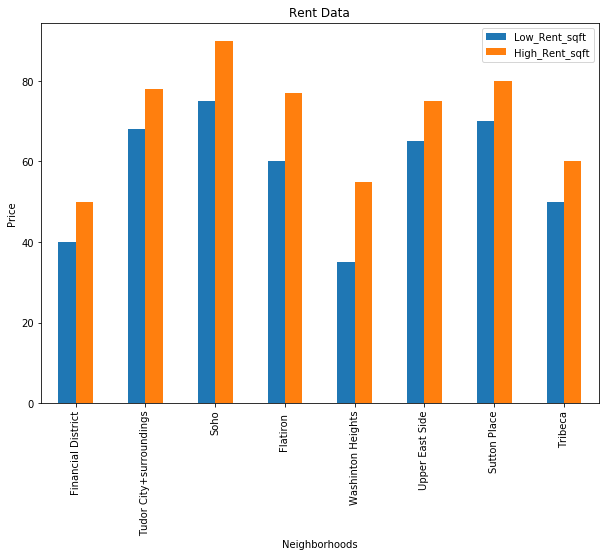

In [84]:
Rent_data.plot( x='Neighborhood',figsize = (10,7), kind = 'bar')
plt.title('Rent Data')
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [88]:
Crime_data=pd.read_csv('crimedata1.csv')

In [89]:
Crime_data

Neighbourhoods                              CRIME  2014  \
0  Financial District, Tribeca, Soho  TOTAL SEVEN MAJOR FELONY OFFENSES  1208   
1                           Flatiron  TOTAL SEVEN MAJOR FELONY OFFENSES  2061   
2           Tudor City, Sutton Place  TOTAL SEVEN MAJOR FELONY OFFENSES   909   
3                    Upper East Side  TOTAL SEVEN MAJOR FELONY OFFENSES  1913   
4                 Washington Heights  TOTAL SEVEN MAJOR FELONY OFFENSES  1151   

   2015  2016  2017  2018  2019  
0  1446  1395  1337  1356  1386  
1  2056  1879  1694  1954  2014  
2   986  1000  1023  1021  1116  
3  1904  1959  1972  2063  2273  
4  1315  1323  1382  1377  1278

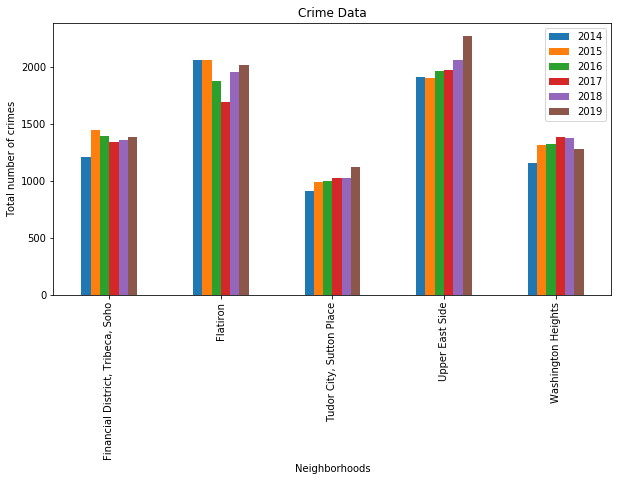

In [91]:
Crime_data.plot(x='Neighbourhoods', figsize = (10,5), kind = 'bar')
plt.title('Crime Data')
plt.xlabel('Neighborhoods')
plt.ylabel('Total number of crimes')
plt.xticks(rotation=90)
plt.show()

## K Means Clustering

In [98]:
man_onehot = pd.get_dummies(man_final[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
man_onehot['Neighborhood'] = man_final['Neighborhood'] 
fixed_columns = [man_onehot.columns[-1]] + list(man_onehot.columns[:-1])
man_onehot = man_onehot[fixed_columns]

man_onehot

Neighborhood  American Restaurant  Arepa Restaurant  \
127   Washington Heights                    0                 0   
131   Washington Heights                    0                 0   
136   Washington Heights                    0                 0   
145   Washington Heights                    1                 0   
146   Washington Heights                    0                 0   
148   Washington Heights                    0                 0   
151   Washington Heights                    0                 0   
152   Washington Heights                    0                 0   
153   Washington Heights                    0                 0   
155   Washington Heights                    0                 0   
156   Washington Heights                    0                 0   
159   Washington Heights                    0                 0   
160   Washington Heights                    0                 0   
169   Washington Heights                    0                 0   
170   Washington Heights                    0                 0   
171   Washington Heights                    0                 0   
173   Washington Heights                    0                 0   
176   Washington Heights                    0                 0   
177   Washington Heights                    0                 1   
182   Washington Heights                    0                 0   
184   Washington Heights                    0                 0   
186   Washington Heights                    0                 0   
199   Washington Heights                    0                 0   
461      Upper East Side                    0                 0   
476      Upper East Side                    1                 0   
477      Upper East Side                    0                 0   
479      Upper East Side                    0                 0   
484      Upper East Side                    0                 0   
485      Upper East Side                    0                 0   
486      Upper East Side                    0                 0   
493      Upper East Side                    0                 0   
496      Upper East Side                    0                 0   
497      Upper East Side                    0                 0   
500      Upper East Side                    0                 0   
503      Upper East Side                    0                 0   
506      Upper East Side                    0                 0   
512      Upper East Side                    0                 0   
514      Upper East Side                    0                 0   
523      Upper East Side                    0                 0   
527      Upper East Side                    0                 0   
532      Upper East Side                    0                 0   
535      Upper East Side                    1                 0   
538      Upper East Side                    0                 0   
539      Upper East Side                    0                 0   
540      Upper East Side                    0                 0   
548      Upper East Side                    0                 0   
1579             Tribeca                    0                 0   
1581             Tribeca                    0                 0   
1591             Tribeca                    0                 0   
1592             Tribeca                    1                 0   
1595             Tribeca                    1                 0   
1598             Tribeca                    0                 0   
1600             Tribeca                    0                 0   
1601             Tribeca                    0                 0   
1603             Tribeca                    0                 0   
1610             Tribeca                    0                 0   
1616             Tribeca                    1                 0   
1621             Tribeca                    0                 0   
1631             Tribeca                    0              

In [99]:
man_grouped = man_onehot.groupby('Neighborhood').mean().reset_index()
man_grouped

Neighborhood  American Restaurant  Arepa Restaurant  \
0  Financial District             0.250000          0.000000   
1            Flatiron             0.086957          0.000000   
2                Soho             0.041667          0.000000   
3        Sutton Place             0.047619          0.000000   
4             Tribeca             0.200000          0.000000   
5          Tudor City             0.040000          0.000000   
6     Upper East Side             0.086957          0.000000   
7  Washington Heights             0.043478          0.043478   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
0                    0.00          0.000000               0.000000   
1                    0.00          0.000000               0.000000   
2                    0.00          0.000000               0.041667   
3                    0.00          0.047619               0.000000   
4                    0.05          0.000000               0.000000   
5                    0.00          0.080000               0.000000   
6                    0.00          0.000000               0.000000   
7                    0.00          0.000000               0.000000   

   Cambodian Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0              0.000000              0.000000            0.000000   
1              0.000000              0.000000            0.000000   
2              0.000000              0.000000            0.000000   
3              0.047619              0.000000            0.000000   
4              0.000000              0.000000            0.050000   
5              0.000000              0.000000            0.000000   
6              0.000000              0.000000            0.043478   
7              0.000000              0.043478            0.130435   

   Cuban Restaurant  Egyptian Restaurant  Falafel Restaurant  \
0          0.000000             0.000000            0.150000   
1          0.043478             0.000000            0.000000   
2          0.000000             0.041667            0.041667   
3          0.000000             0.000000            0.000000   
4          0.000000             0.000000            0.000000   
5          0.000000             0.000000            0.000000   
6          0.000000             0.000000            0.000000   
7          0.000000             0.000000            0.000000   

   Fast Food Restaurant  French Restaurant  Greek Restaurant  \
0              0.050000           0.050000          0.000000   
1              0.043478           0.000000          0.000000   
2              0.000000           0.083333          0.000000   
3              0.000000           0.047619          0.047619   
4              0.000000           0.100000          0.100000   
5              0.000000           0.040000          0.080000   
6              0.000000           0.086957          0.000000   
7              0.000000           0.000000          0.000000   

   Hawaiian Restaurant  Indian Restaurant  Italian Restaurant  \
0                 0.00           0.000000            0.100000   
1                 0.00           0.043478            0.173913   
2                 0.00           0.000000            0.250000   
3                 0.00           0.047619            0.190476   
4                 0.00           0.050000            0.250000   
5                 0.04           0.000000            0.000000   
6                 0.00           0.000000            0.304348   
7                 0.00           0.043478            0.043478   

   Japanese Restaurant  Jewish Restaurant  Kebab Restaurant  \
0             0.100000               0.00          0.000000   
1             0.130435               0.00          0.043478   
2             0.000000               0.00          0.000000   
3             0.000000               0.00          0.000000   
4             0.000000               0.00          0.000000   
5             0.040000               0.04          0.000000  

In [100]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [105]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted['Neighborhood'] = man_grouped['Neighborhood']
for ind in np.arange(man_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_grouped.iloc[ind, :], num_top_venues)

top_venues_sorted

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0  Financial District   American Restaurant             Falafel Restaurant   
1            Flatiron    Italian Restaurant            Japanese Restaurant   
2                Soho    Italian Restaurant       Mediterranean Restaurant   
3        Sutton Place    Italian Restaurant  Vegetarian / Vegan Restaurant   
4             Tribeca    Italian Restaurant            American Restaurant   
5          Tudor City    Mexican Restaurant               Sushi Restaurant   
6     Upper East Side    Italian Restaurant            American Restaurant   
7  Washington Heights    Chinese Restaurant        New American Restaurant   

      3rd Most Common Venue 4th Most Common Venue  \
0        Italian Restaurant    Mexican Restaurant   
1  Mediterranean Restaurant   American Restaurant   
2         French Restaurant      Sushi Restaurant   
3        Mexican Restaurant   American Restaurant   
4          Greek Restaurant     French Restaurant   
5     Vietnamese Restaurant       Thai Restaurant   
6         French Restaurant      Sushi Restaurant   
7          Tapas Restaurant    Spanish Restaurant   

           5th Most Common Venue          6th Most Common Venue  \
0            Japanese Restaurant       Mediterranean Restaurant   
1  Vegetarian / Vegan Restaurant        New American Restaurant   
2          Australian Restaurant  Vegetarian / Vegan Restaurant   
3           Cambodian Restaurant              French Restaurant   
4     Modern European Restaurant               Sushi Restaurant   
5               Asian Restaurant               Greek Restaurant   
6             Mexican Restaurant             Chinese Restaurant   
7      Latin American Restaurant             Mexican Restaurant   

           7th Most Common Venue      8th Most Common Venue  \
0             Seafood Restaurant                 Restaurant   
1               Cuban Restaurant       Fast Food Restaurant   
2             Falafel Restaurant        Egyptian Restaurant   
3      Latin American Restaurant        Lebanese Restaurant   
4              Indian Restaurant          Korean Restaurant   
5             Seafood Restaurant          French Restaurant   
6  Vegetarian / Vegan Restaurant  Latin American Restaurant   
7               Ramen Restaurant          Indian Restaurant   

      9th Most Common Venue   10th Most Common Venue  
0         French Restaurant  New American Restaurant  
1         Indian Restaurant         Kebab Restaurant  
2        Mexican Restaurant      American Restaurant  
3          Greek Restaurant       Persian Restaurant  
4        Seafood Restaurant       Chinese Restaurant  
5       Hawaiian Restaurant      Japanese Restaurant  
6  Mediterranean Restaurant  North Indian Restaurant  
7        Italian Restaurant     Caribbean Restaurant

Now we know the most common venues in each of the neighbourhoods

From the df above that contains the most common venues per each neighbourhood, we can conclude that starting a restaurant that falls into the 4th or 5th most common type would be the safest move. 

In order to further explain my above point.
An example:

- Suppose you wanted to open a restaurant in the Financial District. Opening another American restaurant would lead to heavy initial competition with the already well estabilished American Restaurants. A saturated market means that failure to meet their quality standards would definitely result in heavy losses. While succeeding through such a move is definitely possible, it creates a very high stakes environment for the restaurant itself. 

- On the other hand, opening an Italian restaurant or Japanese restaurant reduces the competition significantly. While the restaurant will experience a comparatively slower start by opting this method, there is a possibilty that the restuarant may grow and the dynamic may shift to these types of cuisines in the near future. This decision will also give the restaurant ample breathing room and potential opportunities to expand its type of cuisine. The analysis conducted clearly shows that Italian restaurants are well liked by the borough of Manhattan.

- A risky move would be opening a Chinese restaurant. While Financial District residents clealry do not prefer Chinese, good quality food as well as the overall popularity of chinese restaurants in other parts of Manhattan may lead to its success. 

This is just for one neighbourhood, a similar approach can be applied to the remaining 7 as well.

In [106]:
kclusters = 5
manhattan_grouped_clustering = man_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
kmeans.labels_[0:10] 

array([2, 4, 4, 1, 1, 0, 1, 3])

In [107]:
top_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

man_merged = man_final
man_merged = man_merged.join(top_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_merged.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
127  Washington Heights              40.851903                -73.9369   
131  Washington Heights              40.851903                -73.9369   
136  Washington Heights              40.851903                -73.9369   
145  Washington Heights              40.851903                -73.9369   
146  Washington Heights              40.851903                -73.9369   

                   Venue  Venue Latitude  Venue Longitude  \
127  The Uptown Garrison       40.851255       -73.939473   
131    Saggio Restaurant       40.851423       -73.939761   
136        Tampopo Ramen       40.850693       -73.936568   
145    The Pandering Pig       40.855226       -73.937793   
146            Las Tapas       40.855234       -73.937284   

          Venue_Category  Cluster Labels 1st Most Common Venue  \
127           Restaurant               3    Chinese Restaurant   
131   Italian Restaurant               3    Chinese Restaurant   
136     Ramen Restaurant               3    Chinese Restaurant   
145  American Restaurant               3    Chinese Restaurant   
146     Tapas Restaurant               3    Chinese Restaurant   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
127  New American Restaurant      Tapas Restaurant    Spanish Restaurant   
131  New American Restaurant      Tapas Restaurant    Spanish Restaurant   
136  New American Restaurant      Tapas Restaurant    Spanish Restaurant   
145  New American Restaurant      Tapas Restaurant    Spanish Restaurant   
146  New American Restaurant      Tapas Restaurant    Spanish Restaurant   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
127  Latin American Restaurant    Mexican Restaurant      Ramen Restaurant   
131  Latin American Restaurant    Mexican Restaurant      Ramen Restaurant   
136  Latin American Restaurant    Mexican Restaurant      Ramen Restaurant   
145  Latin American Restaurant    Mexican Restaurant      Ramen Restaurant   
146  Latin American Restaurant    Mexican Restaurant      Ramen Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
127     Indian Restaurant    Italian Restaurant   Caribbean Restaurant  
131     Indian Restaurant    Italian Restaurant   Caribbean Restaurant  
136     Indian Restaurant    Italian Restaurant   Caribbean Restaurant  
145     Indian Restaurant    Italian Restaurant   Caribbean Restaurant  
146     Indian Restaurant    Italian Restaurant   Caribbean Restaurant

In [118]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged['Neighborhood Latitude'], man_merged['Neighborhood Longitude'], man_merged['Neighborhood'], man_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Through this clustering we can make a lot of inferences about the type of restaurants that are dominant in our selected neighbourhoods.

In [110]:
man_twohot = pd.get_dummies(man_venues1[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
man_twohot['Neighborhood'] = man_venues1['Neighborhood'] 
fixed_columns = [man_twohot.columns[-1]] + list(man_twohot.columns[:-1])
man_twohot = man_twohot[fixed_columns]

man_twohot

Neighborhood  Afghan Restaurant  African Restaurant  \
7             Marble Hill                  0                   0   
14            Marble Hill                  0                   0   
27              Chinatown                  0                   0   
34              Chinatown                  0                   0   
35              Chinatown                  0                   0   
36              Chinatown                  0                   0   
39              Chinatown                  0                   0   
40              Chinatown                  0                   0   
41              Chinatown                  0                   0   
46              Chinatown                  0                   0   
48              Chinatown                  0                   0   
50              Chinatown                  0                   0   
52              Chinatown                  0                   0   
57              Chinatown                  0                   0   
58              Chinatown                  0                   0   
62              Chinatown                  0                   0   
63              Chinatown                  0                   0   
65              Chinatown                  0                   0   
68              Chinatown                  0                   0   
73              Chinatown                  0                   0   
78              Chinatown                  0                   0   
79              Chinatown                  0                   0   
81              Chinatown                  0                   0   
83              Chinatown                  0                   0   
89              Chinatown                  0                   0   
91              Chinatown                  0                   0   
92              Chinatown                  0                   0   
94              Chinatown                  0                   0   
95              Chinatown                  0                   0   
96              Chinatown                  0                   0   
99              Chinatown                  0                   0   
100             Chinatown                  0                   0   
105             Chinatown                  0                   0   
107             Chinatown                  0                   0   
108             Chinatown                  0                   0   
109             Chinatown                  0                   0   
115             Chinatown                  0                   0   
119             Chinatown                  0                   0   
122             Chinatown                  0                   0   
123             Chinatown                  0                   0   
124             Chinatown                  0                   0   
127    Washington Heights                  0                   0   
131    Washington Heights                  0                   0   
136    Washington Heights                  0                   0   
145    Washington Heights                  0                   0   
146    Washington Heights                  0                   0   
148    Washington Heights                  0                   0   
151    Washington Heights                  0                   0   
152    Washington Heights                  0                   0   
153    Washington Heights                  0                   0   
155    Washington Heights                  0                   0   
156    Washington Heights                  0                   0   
159    Washington Heights                  0                   0   
160    Washington Heights                  0                   0   
169    Washington Heights                  0                   0   
170    Washington Heights                  0                   0   
171    Washington Heights                  0                   0   
173    Washington Heights                  0                   0   
1

In [111]:
man_group = man_twohot.groupby('Neighborhood').mean().reset_index()
man_group

Neighborhood  Afghan Restaurant  African Restaurant  \
0     Battery Park City           0.000000                 0.0   
1         Carnegie Hill           0.000000                 0.0   
2        Central Harlem           0.000000                 0.2   
3               Chelsea           0.000000                 0.0   
4             Chinatown           0.000000                 0.0   
5          Civic Center           0.000000                 0.0   
6               Clinton           0.000000                 0.0   
7           East Harlem           0.000000                 0.0   
8          East Village           0.000000                 0.0   
9    Financial District           0.000000                 0.0   
10             Flatiron           0.000000                 0.0   
11             Gramercy           0.000000                 0.0   
12    Greenwich Village           0.000000                 0.0   
13     Hamilton Heights           0.000000                 0.0   
14         Hudson Yards           0.000000                 0.0   
15               Inwood           0.000000                 0.0   
16           Lenox Hill           0.038462                 0.0   
17       Lincoln Square           0.000000                 0.0   
18         Little Italy           0.000000                 0.0   
19      Lower East Side           0.000000                 0.0   
20     Manhattan Valley           0.000000                 0.0   
21       Manhattanville           0.000000                 0.0   
22          Marble Hill           0.000000                 0.0   
23              Midtown           0.000000                 0.0   
24        Midtown South           0.000000                 0.0   
25  Morningside Heights           0.000000                 0.0   
26          Murray Hill           0.000000                 0.0   
27                 Noho           0.000000                 0.0   
28     Roosevelt Island           0.000000                 0.0   
29                 Soho           0.000000                 0.0   
30         Sutton Place           0.000000                 0.0   
31              Tribeca           0.000000                 0.0   
32           Tudor City           0.000000                 0.0   
33           Turtle Bay           0.000000                 0.0   
34      Upper East Side           0.000000                 0.0   
35      Upper West Side           0.000000                 0.0   
36   Washington Heights           0.000000                 0.0   
37         West Village           0.000000                 0.0   
38            Yorkville           0.000000                 0.0   

    American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
0              0.000000          0.000000                0.000000   
1              0.052632          0.000000                0.052632   
2              0.133333          0.000000                0.000000   
3              0.214286          0.000000                0.000000   
4              0.076923          0.000000                0.000000   
5              0.192308          0.000000                0.000000   
6              0.176471          0.000000                0.000000   
7              0.000000          0.000000                0.000000   
8              0.027778          0.027778                0.027778   
9              0.250000          0.000000                0.000000   
10             0.086957          0.000000                0.000000   
11             0.166667          0.000000                0.000000   
12             0.031250          0.000000                0.000000   
13             0.000000          0.000000                0.000000   
14             0.300000          0.000000                0.000000   
15             0.111111          0.000000                0.000000   
16             0.000000          0.000000                0.000000   
17             0.176471          0.000000                0.000000   
18             0.000000          0.000000                0.

In [113]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
all_venues_sorted = pd.DataFrame(columns=columns)
all_venues_sorted['Neighborhood'] = man_group['Neighborhood']
for ind in np.arange(man_group.shape[0]):
    all_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_group.iloc[ind, :], num_top_venues)

all_venues_sorted

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0     Battery Park City    Chinese Restaurant       Mediterranean Restaurant   
1         Carnegie Hill   Japanese Restaurant             Italian Restaurant   
2        Central Harlem    African Restaurant             Chinese Restaurant   
3               Chelsea   American Restaurant             Italian Restaurant   
4             Chinatown    Chinese Restaurant            American Restaurant   
5          Civic Center     French Restaurant            American Restaurant   
6               Clinton    Italian Restaurant            American Restaurant   
7           East Harlem    Mexican Restaurant      Latin American Restaurant   
8          East Village    Mexican Restaurant            Japanese Restaurant   
9    Financial District   American Restaurant             Falafel Restaurant   
10             Flatiron    Italian Restaurant       Mediterranean Restaurant   
11             Gramercy    Italian Restaurant            American Restaurant   
12    Greenwich Village    Italian Restaurant               Sushi Restaurant   
13     Hamilton Heights    Mexican Restaurant               Sushi Restaurant   
14         Hudson Yards   American Restaurant             Italian Restaurant   
15               Inwood    Mexican Restaurant                     Restaurant   
16           Lenox Hill    Italian Restaurant               Sushi Restaurant   
17       Lincoln Square    Italian Restaurant            American Restaurant   
18         Little Italy    Chinese Restaurant       Mediterranean Restaurant   
19      Lower East Side    Chinese Restaurant          Vietnamese Restaurant   
20     Manhattan Valley    Mexican Restaurant          Vietnamese Restaurant   
21       Manhattanville    Seafood Restaurant             Italian Restaurant   
22          Marble Hill   American Restaurant             Seafood Restaurant   
23              Midtown   Japanese Restaurant               Cuban Restaurant   
24        Midtown South     Korean Restaurant            Japanese Restaurant   
25  Morningside Heights   American Restaurant             Mexican Restaurant   
26          Murray Hill   Japanese Restaurant       Mediterranean Restaurant   
27                 Noho    Italian Restaurant            Japanese Restaurant   
28     Roosevelt Island      Greek Restaurant            Japanese Restaurant   
29                 Soho    Italian Restaurant       Mediterranean Restaurant   
30         Sutton Place    Italian Restaurant             Mexican Restaurant   
31              Tribeca    Italian Restaurant            American Restaurant   
32           Tudor City    Mexican Restaurant               Sushi Restaurant   
33           Turtle Bay    Italian Restaurant               Sushi Restaurant   
34      Upper East Side    Italian Restaurant               Sushi Restaurant   
35      Upper West Side    Italian Restaurant  Vegetarian / Vegan Restaurant   
36   Washington Heights    Chinese Restaurant             Spanish Restaurant   
37         West Village    Italian Restaurant            American Restaurant   
38            Yorkville    Italian Restaurant               Sushi Restaurant   

            3rd Most Common Venue      4th Most Common Venue  \
0              Mexican Restaurant      Vietnamese Restaurant   
1               French Restaurant      Vietnamese Restaurant   
2             American Restaurant         Seafood Restaurant   
3              Seafood Restaurant                 Restaurant   
4           Vietnamese Restaurant        Shanghai Restaurant   
5                Sushi Restaurant      Vietnamese Restaurant   
6                 Thai Restaurant    New American Restaurant   
7                 Thai Restaurant           Cuban Restaurant   
8                Ramen Restaurant      Vietnamese Restaurant   
9             Japanese Restaurant         Italian Restaurant   
10            Japanese Restaurant        American Restaurant   
11                Thai Restaurant         

In [115]:
kclusters1 = 5
manhattan_grouped_clustering1 = man_group.drop('Neighborhood', 1)
kmeans1 = KMeans(n_clusters=kclusters1, random_state=0).fit(manhattan_grouped_clustering1)
kmeans1.labels_[0:10] 

array([2, 1, 2, 0, 2, 1, 0, 2, 2, 0])

In [116]:
all_venues_sorted.insert(0, 'Cluster Labels', kmeans1.labels_)

man_merged1 = man_venues1
man_merged1 = man_merged1.join(all_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_merged1.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
7   Marble Hill              40.876551              -73.910660   
14  Marble Hill              40.876551              -73.910660   
27    Chinatown              40.715618              -73.994279   
34    Chinatown              40.715618              -73.994279   
35    Chinatown              40.715618              -73.994279   

                    Venue  Venue Latitude  Venue Longitude  \
7   Land & Sea Restaurant       40.877885       -73.905873   
14          Boston Market       40.877430       -73.905412   
27                 Kiki's       40.714476       -73.992036   
34         The Fat Radish       40.715323       -73.991950   
35     Da Yu Hot Pot 大渝火锅       40.716735       -73.995752   

         Venue_Category  Cluster Labels 1st Most Common Venue  \
7    Seafood Restaurant               4   American Restaurant   
14  American Restaurant               4   American Restaurant   
27     Greek Restaurant               2    Chinese Restaurant   
34   English Restaurant               2    Chinese Restaurant   
35    Hotpot Restaurant               2    Chinese Restaurant   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
7     Seafood Restaurant  Vietnamese Restaurant     French Restaurant   
14    Seafood Restaurant  Vietnamese Restaurant     French Restaurant   
27   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   
34   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   
35   American Restaurant  Vietnamese Restaurant   Shanghai Restaurant   

            5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7             Empanada Restaurant    English Restaurant  Ethiopian Restaurant   
14            Empanada Restaurant    English Restaurant  Ethiopian Restaurant   
27  Vegetarian / Vegan Restaurant      Greek Restaurant      Malay Restaurant   
34  Vegetarian / Vegan Restaurant      Greek Restaurant      Malay Restaurant   
35  Vegetarian / Vegan Restaurant      Greek Restaurant      Malay Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
7     Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant  
14    Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant  
27    Mexican Restaurant   Dumpling Restaurant     Dim Sum Restaurant  
34    Mexican Restaurant   Dumpling Restaurant     Dim Sum Restaurant  
35    Mexican Restaurant   Dumpling Restaurant     Dim Sum Restaurant

In [120]:
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x1 = np.arange(kclusters1)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged1['Neighborhood Latitude'], man_merged1['Neighborhood Longitude'], man_merged1['Neighborhood'], man_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

# A Rough Conclusion

The above cluster displays the predominant clusters (Colour purple, red, blue) and we can see that these areas are heavily populated with Chinese/Italian/Mexican restaurants. When we compare this with our earlier clustering of the 8 neighbourhoods, we find out that most of our 8 neighbourhoods selected lie within the purple cluster category. similar result. 


The best neighborhoods according to the analysis conducted are 

- Washington Heights
- Financial District
- Tudor City

Both Washington Heights and Financial District have a lot of potential for growth with 24 and 22 restaurants respectively. Their rent price is significantly lower than the other neighbourhoods and they lie in the higher population density ranges according to the data provided by www.heath.ny.gov. In addition to this, the crime rate in these neighbourhoods is much better when compared to the other neighbourhoods.

Tudor City is third in the list as inspite of being a residential area and having the lowest crime rate, the commercial rent prices are quite high. It also has the highest number of restaurants amongst all the 8 neighbourhoods selected, which means comparatively higher competition. However, it is still an excellent choice to open a restaurant in due to its residential and low crime rate advantages.

While these above conclusions have been made through thorough analysis, they're by no means completely accurate or absolute. Business owners may find success by opening restaurants in saturated places such as Chinatown as well. These conclusions can then be used as guidelines and compared with other neighborhoods of Manhattan. 